In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5099999999999998, 1.53, 1.55, 1.57, 1.59, 1.6099999999999999, 1.6300000000000001, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.9100000000000001, 1.93, 1.95, 1.97, 1.9900000000000002, 2.0100000000000002, 2.03, 2.05, 2.0700000000000003, 2.09, 2.1100000000000003, 2.13, 2.1500000000000004, 2.17, 2.19, 2.21, 2.23, 2.25, 2.27, 2.29, 2.3099999999999996, 2.33, 2.3499999999999996, 2.37, 2.39, 2.41, 2.43, 2.45, 2.4699999999999998, 2.49, 2.5100000000000002, 2.5300000000000002, 2.55, 2.57, 2.59, 2.61, 2.63, 2.65, 2.67, 2.69, 2.71, 2.73, 2.75, 2.7700000000000005, 2.79, 2.81, 2.83, 2.85, 2.87, 2.89, 2.91, 2.9299999999999997, 2.95, 2.97, 2.99, 3.01, 3.0300000000000002, 3.0500000000000003, 3.07, 3.09, 3.1100000000000003, 3.13, 3.1500000000000004, 3.17, 3.1900000000000004, 3.21, 3.2300000000000004, 3.25, 3.27, 3.29, 3.3099999999999996, 3.3300000000000005, 3.3499999999999996, 3.37, 3.39, 3.41, 3.43, 3.4499999999999997, 3.4699999999999998, 3.49, 3.51, 3.5300000000000002, 3.5500000000000003, 3.5700000000000003, 3.59, 3.61, 3.63, 3.6500000000000004, 3.67, 3.6899999999999995, 3.7100000000000004, 3.7299999999999995, 3.75, 3.77, 3.79, 3.8100000000000005, 3.8299999999999996, 3.8499999999999996, 3.87, 3.8899999999999997, 3.91, 3.93, 3.95, 3.9699999999999998, 3.9899999999999998, 4.01, 4.03, 4.05, 4.07, 4.09, 4.109999999999999, 4.13, 4.15, 4.17, 4.19, 4.21, 4.23, 4.25, 4.2700000000000005, 4.29, 4.31, 4.33, 4.35, 4.37, 4.390000000000001, 4.409999999999999, 4.43, 4.45, 4.47, 4.49, 4.51, 4.53, 4.550000000000001, 4.569999999999999, 4.59, 4.61, 4.63, 4.65, 4.67, 4.6899999999999995, 4.71, 4.7299999999999995, 4.75, 4.7700000000000005, 4.789999999999999, 4.8100000000000005, 4.83, 4.85, 4.87, 4.89, 4.91, 4.930000000000001, 4.95, 4.97, 4.99]

start = X[0] - (X[2] - X[1])/2
stop = X[-1] + (X[2] - X[1])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -2.5; 2 < pT < 3

Y_OS = [4378.0, 4279.0, 4432.0, 4032.0, 3991.0, 3931.0, 3847.0, 3854.0, 3854.0, 3658.0, 3455.0, 3532.0, 3552.0, 3314.0, 3420.0, 3223.0, 3246.0, 3255.0, 3209.0, 3125.0, 3087.0, 2909.0, 3022.0, 2898.0, 2788.0, 2829.0, 2741.0, 2606.0, 2551.0, 2609.0, 2542.0, 2605.0, 2537.0, 2465.0, 2406.0, 2261.0, 2283.0, 2338.0, 2323.0, 2330.0, 2237.0, 2194.0, 2247.0, 2231.0, 2221.0, 2060.0, 2191.0, 2083.0, 2078.0, 2031.0, 2086.0, 2042.0, 1982.0, 1927.0, 1918.0, 1962.0, 1920.0, 1896.0, 1784.0, 1840.0, 1769.0, 1857.0, 1725.0, 1764.0, 1770.0, 1819.0, 1767.0, 1802.0, 1905.0, 1989.0, 2137.0, 2376.0, 2522.0, 2943.0, 3288.0, 3966.0, 4425.0, 5203.0, 5604.0, 5992.0, 6037.0, 5538.0, 4825.0, 3967.0, 3071.0, 2233.0, 1757.0, 1445.0, 1073.0, 965.0, 866.0, 892.0, 797.0, 746.0, 722.0, 733.0, 695.0, 642.0, 678.0, 635.0, 650.0, 621.0, 613.0, 595.0, 624.0, 583.0, 587.0, 629.0, 543.0, 579.0, 564.0, 529.0, 566.0, 496.0, 502.0, 427.0, 402.0, 428.0, 407.0, 376.0, 394.0, 349.0, 374.0, 385.0, 317.0, 347.0, 333.0, 339.0, 344.0, 315.0, 327.0, 322.0, 317.0, 290.0, 279.0, 288.0, 256.0, 255.0, 255.0, 238.0, 255.0, 267.0, 233.0, 227.0, 220.0, 214.0, 212.0, 197.0, 218.0, 207.0, 201.0, 195.0, 240.0, 184.0, 176.0, 173.0, 186.0, 188.0, 155.0, 177.0, 153.0, 178.0, 150.0, 144.0, 173.0, 158.0, 148.0, 151.0, 148.0, 133.0, 138.0, 145.0, 130.0, 128.0, 121.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [819.0, 771.0, 780.0, 725.0, 740.0, 719.0, 691.0, 774.0, 679.0, 719.0, 677.0, 681.0, 673.0, 659.0, 646.0, 660.0, 647.0, 632.0, 648.0, 621.0, 600.0, 595.0, 632.0, 590.0, 556.0, 573.0, 582.0, 595.0, 564.0, 553.0, 555.0, 556.0, 583.0, 569.0, 542.0, 543.0, 534.0, 572.0, 571.0, 556.0, 542.0, 550.0, 554.0, 495.0, 537.0, 549.0, 565.0, 524.0, 516.0, 558.0, 581.0, 558.0, 518.0, 506.0, 481.0, 523.0, 468.0, 527.0, 524.0, 540.0, 504.0, 511.0, 471.0, 464.0, 458.0, 453.0, 431.0, 427.0, 451.0, 405.0, 413.0, 381.0, 411.0, 372.0, 348.0, 402.0, 330.0, 320.0, 354.0, 308.0, 315.0, 315.0, 278.0, 306.0, 272.0, 269.0, 304.0, 271.0, 249.0, 278.0, 250.0, 221.0, 214.0, 245.0, 223.0, 210.0, 236.0, 210.0, 228.0, 205.0, 200.0, 220.0, 193.0, 176.0, 175.0, 175.0, 191.0, 162.0, 182.0, 172.0, 169.0, 164.0, 146.0, 138.0, 130.0, 157.0, 118.0, 138.0, 133.0, 148.0, 139.0, 124.0, 123.0, 114.0, 117.0, 119.0, 129.0, 127.0, 101.0, 111.0, 123.0, 108.0, 104.0, 103.0, 109.0, 92.0, 81.0, 96.0, 99.0, 101.0, 87.0, 92.0, 74.0, 94.0, 77.0, 80.0, 75.0, 69.0, 79.0, 84.0, 76.0, 52.0, 60.0, 75.0, 68.0, 66.0, 78.0, 65.0, 72.0, 63.0, 77.0, 63.0, 60.0, 50.0, 52.0, 47.0, 60.0, 44.0, 44.0, 54.0, 51.0, 41.0, 48.0, 48.0, 43.0]
        
vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [16.0, 10.0, 9.0, 9.0, 12.0, 14.0, 14.0, 18.0, 22.0, 29.0, 18.0, 13.0, 19.0, 31.0, 17.0, 17.0, 35.0, 29.0, 33.0, 26.0, 39.0, 31.0, 27.0, 40.0, 36.0, 42.0, 50.0, 53.0, 40.0, 63.0, 60.0, 62.0, 68.0, 62.0, 78.0, 75.0, 86.0, 65.0, 82.0, 86.0, 87.0, 89.0, 102.0, 92.0, 102.0, 107.0, 124.0, 144.0, 161.0, 171.0, 184.0, 166.0, 179.0, 220.0, 234.0, 233.0, 318.0, 321.0, 378.0, 402.0, 508.0, 521.0, 587.0, 683.0, 759.0, 955.0, 1099.0, 1317.0, 1491.0, 1862.0, 2258.0, 2689.0, 3520.0, 4254.0, 5547.0, 7171.0, 9087.0, 11397.0, 13855.0, 15572.0, 16005.0, 15049.0, 12352.0, 9183.0, 5839.0, 3481.0, 2007.0, 1121.0, 587.0, 338.0, 209.0, 174.0, 109.0, 98.0, 70.0, 46.0, 45.0, 34.0, 34.0, 30.0, 21.0, 15.0, 24.0, 10.0, 15.0, 7.0, 9.0, 8.0, 8.0, 13.0, 6.0, 3.0, 2.0, 7.0, 4.0, 5.0, 4.0, 2.0, 0.0, 2.0, 2.0, 4.0, 4.0, 4.0, 1.0, 3.0, 1.0, 2.0, 2.0, 0.0, 0.0, 3.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [4.0, 1.0, 2.0, 5.0, 4.0, 3.0, 5.0, 5.0, 3.0, 4.0, 5.0, 1.0, 12.0, 3.0, 3.0, 8.0, 6.0, 9.0, 4.0, 2.0, 9.0, 11.0, 7.0, 10.0, 11.0, 5.0, 12.0, 10.0, 7.0, 13.0, 10.0, 13.0, 11.0, 12.0, 9.0, 13.0, 11.0, 18.0, 21.0, 13.0, 20.0, 16.0, 18.0, 24.0, 22.0, 9.0, 25.0, 29.0, 23.0, 15.0, 35.0, 29.0, 30.0, 21.0, 31.0, 40.0, 35.0, 39.0, 33.0, 31.0, 44.0, 28.0, 47.0, 49.0, 56.0, 37.0, 51.0, 43.0, 75.0, 69.0, 53.0, 64.0, 69.0, 76.0, 77.0, 75.0, 103.0, 99.0, 87.0, 108.0, 131.0, 123.0, 129.0, 156.0, 148.0, 187.0, 198.0, 212.0, 284.0, 293.0, 311.0, 372.0, 348.0, 472.0, 557.0, 627.0, 667.0, 867.0, 971.0, 1084.0, 1269.0, 1608.0, 2000.0, 2462.0, 3246.0, 4055.0, 5271.0, 6416.0, 7492.0, 8211.0, 8194.0, 7382.0, 5972.0, 4269.0, 2684.0, 1605.0, 867.0, 497.0, 286.0, 149.0, 104.0, 77.0, 50.0, 45.0, 37.0, 20.0, 17.0, 23.0, 14.0, 6.0, 10.0, 10.0, 7.0, 14.0, 7.0, 4.0, 7.0, 4.0, 1.0, 2.0, 3.0, 2.0, 5.0, 1.0, 4.0, 1.0, 3.0, 1.0, 2.0, 1.0, 0.0, 3.0, 2.0, 0.0, 1.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [20.0, 11.0, 11.0, 14.0, 16.0, 17.0, 19.0, 23.0, 25.0, 33.0, 23.0, 14.0, 31.0, 34.0, 20.0, 25.0, 41.0, 38.0, 37.0, 28.0, 48.0, 42.0, 34.0, 50.0, 47.0, 47.0, 62.0, 63.0, 47.0, 76.0, 70.0, 75.0, 79.0, 74.0, 87.0, 88.0, 97.0, 83.0, 103.0, 99.0, 107.0, 105.0, 120.0, 116.0, 124.0, 116.0, 149.0, 173.0, 184.0, 186.0, 219.0, 195.0, 209.0, 241.0, 265.0, 273.0, 353.0, 360.0, 411.0, 433.0, 552.0, 549.0, 634.0, 732.0, 815.0, 992.0, 1150.0, 1360.0, 1566.0, 1931.0, 2311.0, 2753.0, 3589.0, 4330.0, 5624.0, 7246.0, 9190.0, 11496.0, 13942.0, 15680.0, 16136.0, 15172.0, 12481.0, 9339.0, 5987.0, 3668.0, 2205.0, 1333.0, 871.0, 631.0, 520.0, 546.0, 457.0, 570.0, 627.0, 673.0, 712.0, 901.0, 1005.0, 1114.0, 1290.0, 1623.0, 2024.0, 2472.0, 3261.0, 4062.0, 5280.0, 6424.0, 7500.0, 8224.0, 8200.0, 7385.0, 5974.0, 4276.0, 2688.0, 1610.0, 871.0, 499.0, 286.0, 151.0, 106.0, 81.0, 54.0, 49.0, 38.0, 23.0, 18.0, 25.0, 16.0, 6.0, 10.0, 13.0, 7.0, 16.0, 8.0, 5.0, 7.0, 5.0, 3.0, 3.0, 4.0, 3.0, 6.0, 1.0, 5.0, 4.0, 3.0, 1.0, 2.0, 1.0, 0.0, 3.0, 2.0, 0.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 2.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(175, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 242223.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

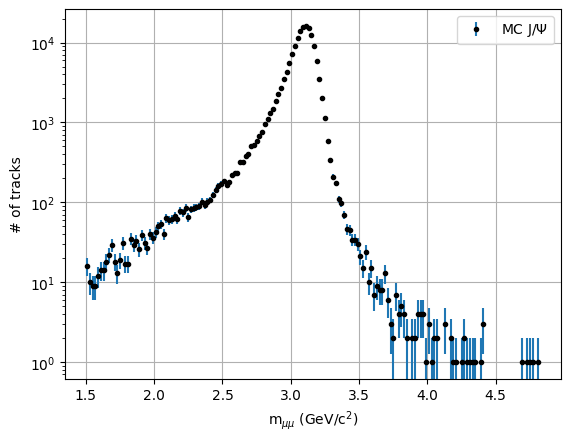

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [16205.49338324476, 3.100710131675165, 0.06357356284816774, 0.9525253697640731, 3.3105574964663806, 2.2688037295032246, 2.7342942733180644]
pcov: 
 [[ 9.95150001e+03  1.23126364e-02 -2.64192464e-02 -1.38593547e-01
  -1.64656955e-01 -8.26236823e-01  1.98726830e+00]
 [ 1.23126364e-02  2.33348777e-07 -1.29599566e-07 -4.26885919e-06
   1.43689804e-05 -2.26119592e-06  2.57371157e-06]
 [-2.64192464e-02 -1.29599566e-07  1.87178345e-07  3.72990717e-06
  -9.34586001e-06  7.38934614e-06 -1.62918529e-05]
 [-1.38593547e-01 -4.26885919e-06  3.72990717e-06  1.98199010e-04
  -9.11684196e-04  1.31569723e-04 -2.58297269e-04]
 [-1.64656955e-01  1.43689804e-05 -9.34586001e-06 -9.11684196e-04
   6.03044424e-03 -2.76824894e-04  4.65103382e-04]
 [-8.26236823e-01 -2.26119592e-06  7.38934614e-06  1.31569723e-04
  -2.76824894e-04  2.03831839e-03 -7.17765936e-03]
 [ 1.98726830e+00  2.57371157e-06 -1.62918529e-05 -2.58297269e-04
   4.65103382e-04 -7.17765936e-03  3.43614291e-02]]
residual: 
 {'nfev': 7, 

fit error : 99.7574189585241


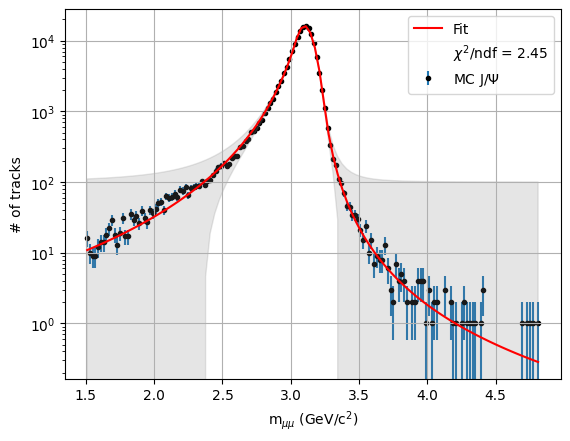

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_13221/2642993752.py:1: RuntimeWarning: divide by zero encountered in divide
  err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))


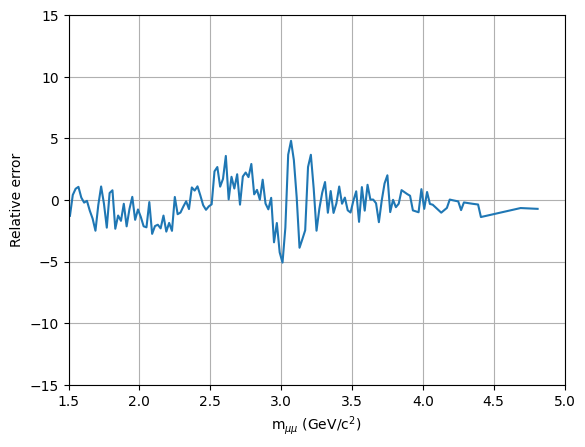

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

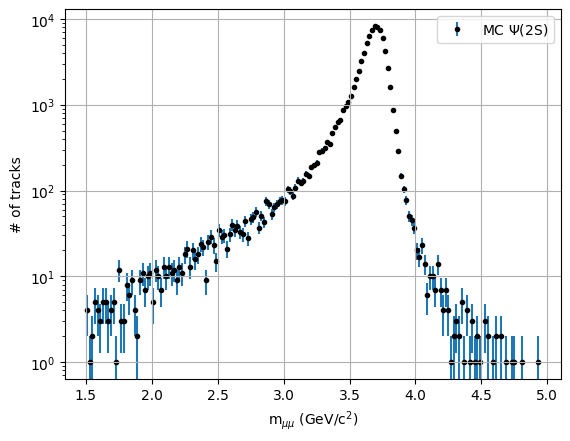

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [8388.10374938025, 3.6944106382951016, 0.06429992359166896, 0.9170824788660665, 3.080615305287348, 2.2596144060674725, 2.962361928819595]
pcov: 
 [[ 3.54582700e+03  8.84803480e-03 -1.85990311e-02 -7.91804924e-02
  -1.24224776e-01 -6.33430401e-01  1.76834819e+00]
 [ 8.84803480e-03  3.30256821e-07 -1.86034803e-07 -5.30745653e-06
   1.42041270e-05 -3.55927053e-06  5.02450552e-06]
 [-1.85990311e-02 -1.86034803e-07  2.62983498e-07  4.63662288e-06
  -9.04165133e-06  1.11242204e-05 -2.88551707e-05]
 [-7.91804924e-02 -5.30745653e-06  4.63662288e-06  2.11167602e-04
  -7.78631876e-04  1.75788136e-04 -4.09771783e-04]
 [-1.24224776e-01  1.42041270e-05 -9.04165133e-06 -7.78631876e-04
   4.32284913e-03 -2.81696476e-04  5.55843563e-04]
 [-6.33430401e-01 -3.55927053e-06  1.11242204e-05  1.75788136e-04
  -2.81696476e-04  3.20097878e-03 -1.33821088e-02]
 [ 1.76834819e+00  5.02450552e-06 -2.88551707e-05 -4.09771783e-04
   5.55843563e-04 -1.33821088e-02  7.47715682e-02]]
residual: 
 {'nfev': 9, 'f

fit error : 59.54753991533144


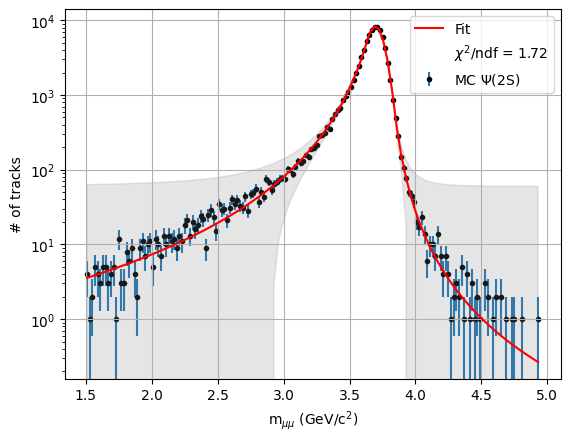

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

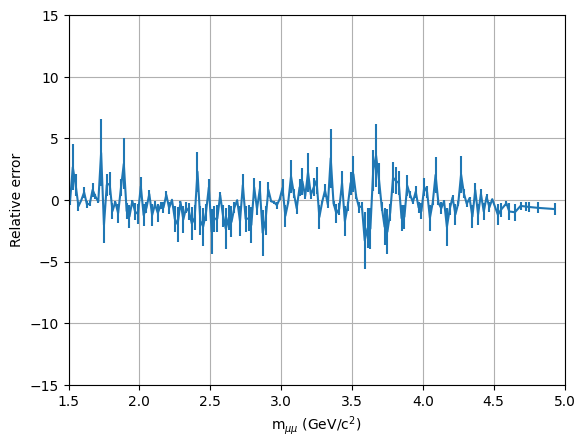

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

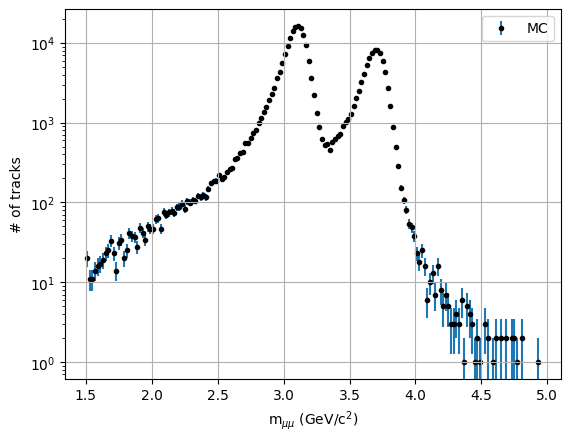

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [16185.850781618292, 3.1005268655134444, 0.06369788027891711, 8385.655525554379, 3.694335743417408, 0.06438003164384096]
pcov: 
 [[ 1.02686403e+04  7.98969556e-03 -2.19569221e-02 -4.37531051e+01
  -7.67771343e-04  9.89934087e-04]
 [ 7.98969556e-03  1.39861695e-07 -3.11228575e-08  3.50646879e-05
   1.85102527e-09 -1.58538477e-09]
 [-2.19569221e-02 -3.11228575e-08  9.13053380e-08  6.53797252e-04
   9.35370187e-09 -1.30230699e-08]
 [-4.37531051e+01  3.50646879e-05  6.53797252e-04  5.19704906e+03
   9.89195139e-03 -2.24534239e-02]
 [-7.67771343e-04  1.85102527e-09  9.35370187e-09  9.89195139e-03
   2.86251609e-07 -8.83615433e-08]
 [ 9.89934087e-04 -1.58538477e-09 -1.30230699e-08 -2.24534239e-02
  -8.83615433e-08  1.90518252e-07]]
residual: 
 {'nfev': 4, 'fvec': array([-1.22768419,  1.21481903,  1.37900084,  0.57320825,  0.18602633,
        0.0905789 , -0.22144685, -0.89036421, -1.10772794, -2.22274315,
       -0.4081882 ,  2.11067004, -1.47288054, -1.75760316,  1.06378894,
        

fit error : 124.36112466921652


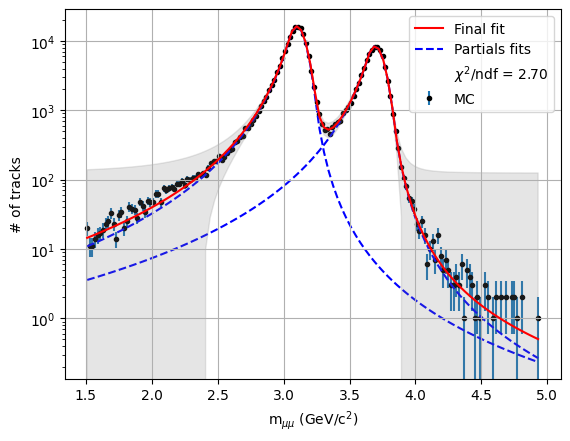

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_13221/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


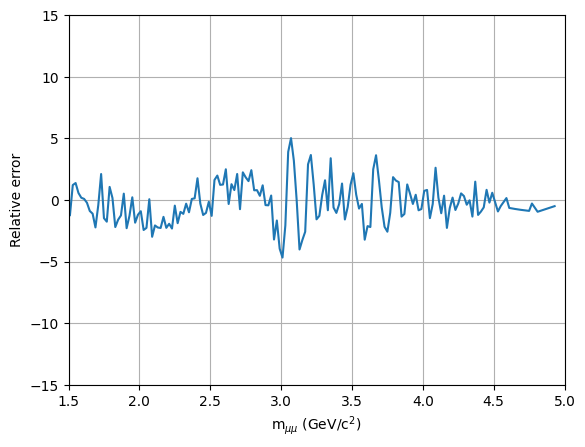

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

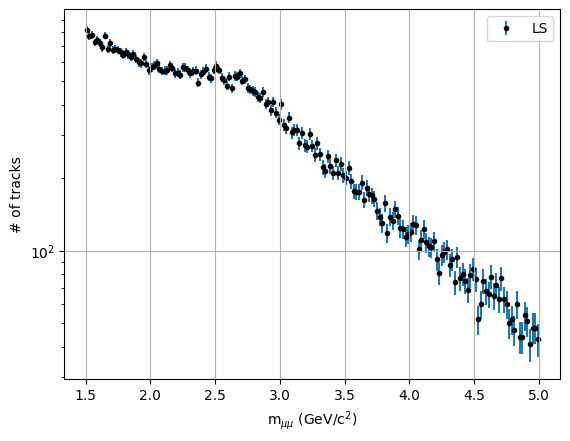

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [6.592359067253779, 6.215922199392269, 5.446675433692873, 5.015762215300373, 3.9584076080294714]
pcov: 
 [[ 4.36651861e-04 -7.49333063e-05  7.47515615e-05  1.38647330e-05
   1.73277130e-04]
 [-7.49333063e-05  8.80553596e-05  1.19652965e-05 -1.24882149e-05
   2.83856119e-05]
 [ 7.47515615e-05  1.19652965e-05  1.71317587e-04  1.41198401e-04
  -1.72596801e-05]
 [ 1.38647330e-05 -1.24882149e-05  1.41198401e-04  2.64937444e-04
  -3.92388485e-04]
 [ 1.73277130e-04  2.83856119e-05 -1.72596801e-05 -3.92388485e-04
   4.47054367e-03]]
residual: 
 {'nfev': 17, 'fvec': array([-3.19666932, -1.70895329, -2.16370027, -0.34963467, -1.04437258,
       -0.42581564,  0.47782591, -2.67699159,  0.63207498, -1.02935011,
        0.39615953,  0.08414487,  0.23366388,  0.61954287,  0.9726816 ,
        0.25357036,  0.60070411,  1.03490058,  0.22491689,  1.1398145 ,
        1.83923376,  1.87220689,  0.16912803,  1.72097895,  3.0246081 ,
        2.08048744,  1.50255805,  0.76500037,  1.89635528,  2.184689

fit error : 0.07369875117726074


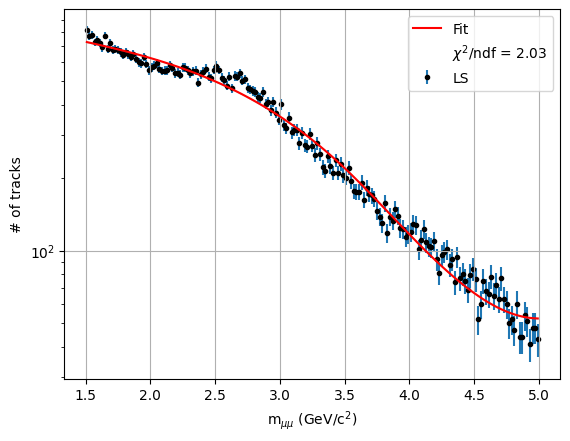

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

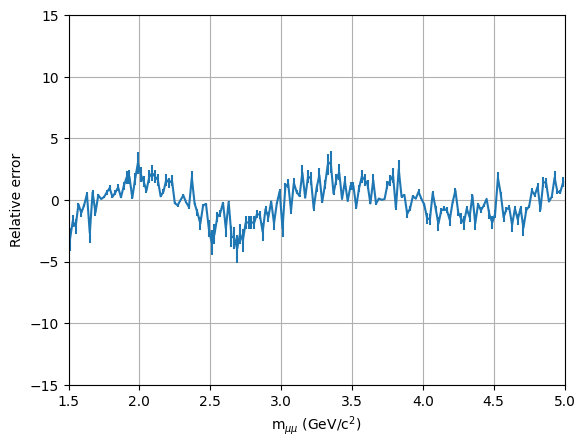

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

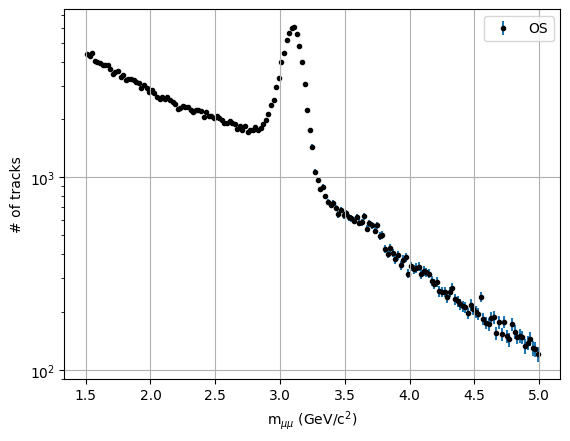

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [5117.483890840639, 3.095496541670225, 0.0699309191329845, 45.13487152281592, 3.7169702163850324, 0.05786993123250207, 8.366497806945176, 7.537677662466235, 6.56311486955896, 6.111621353127822, 4.942373353535616]
pcov: 
 [[ 3.30396317e+03  7.99182238e-03 -2.76789430e-02  1.15937960e+01
  -3.67515482e-02  6.95919012e-02 -1.94803853e-02 -9.28293693e-03
  -5.68741163e-02 -3.21871775e-02 -3.69042842e-02]
 [ 7.99182238e-03  6.81931909e-07 -2.49484225e-07 -1.70584008e-04
   9.00862688e-07 -1.48993680e-06  2.39760963e-08  9.62343933e-07
   1.48383194e-06  5.39990896e-07  1.62080714e-06]
 [-2.76789430e-02 -2.49484225e-07  8.02802730e-07  1.37729642e-03
  -2.70089476e-06  5.25236505e-06 -1.01882552e-06 -2.43346034e-06
  -5.98711277e-06 -3.39482584e-06 -3.39003018e-06]
 [ 1.15937960e+01 -1.70584008e-04  1.37729642e-03  4.36578695e+02
   6.98505698e-02 -3.58057815e-01 -9.05604839e-03 -6.94826834e-03
  -5.09479655e-02 -5.80089431e-02  5.48701856e-02]
 [-3.67515482e-02  9.00862688e-07 -2.70

fit error : 61.16001082409011


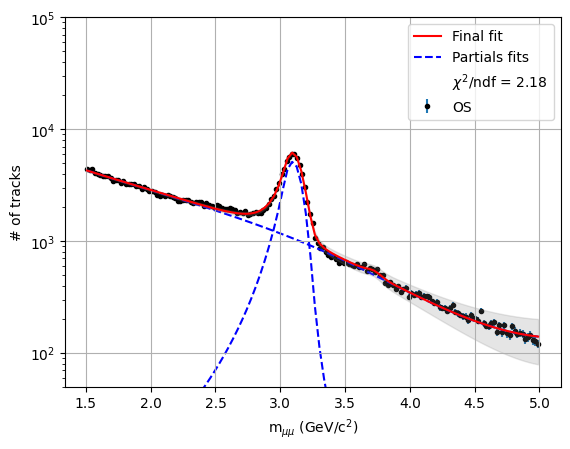

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

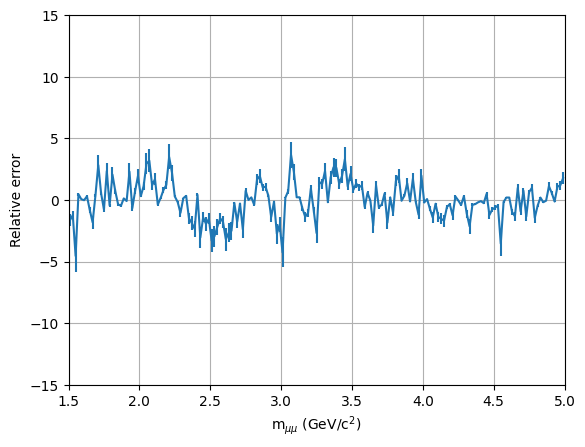

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  54556.29607378631  +/-  1018.8600583233981 (stat.)
